Vamos atuar como cientistas de dados de uma empresa que aluga bicicletas. A ideia é entender quais fatores afetam a demanda por bicicletas para que a empresa possa criar planos de ação específicos para atender a clientela.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('bicicletas.txt')
dados.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


Tratando dados nulos

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [4]:
dados.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [5]:
dados['temperatura'] = dados['temperatura'].interpolate(method='linear')
dados['sensacao_termica'] = dados['sensacao_termica'].interpolate(method='linear')

In [6]:
dados.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


Identificando dados duplicado

In [7]:
dados.duplicated().sum()

np.int64(15)

In [8]:
duplicados = dados.duplicated(keep=False)

In [9]:
linhas_duplicadas = dados[duplicados]
linhas_duplicadas.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


Organizando as linhas dos valores duplicados, por data e hora

In [10]:
linhas_duplicadas.sort_values(by='data_hora')
linhas_duplicadas.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


Removendo dados duplicados

In [11]:
dados_limpo = dados.drop_duplicates()
dados_limpo.shape

(17414, 10)

Explorando os dados que temos a disposição

In [12]:
dados_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


Analisando as distribuições com grafico 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

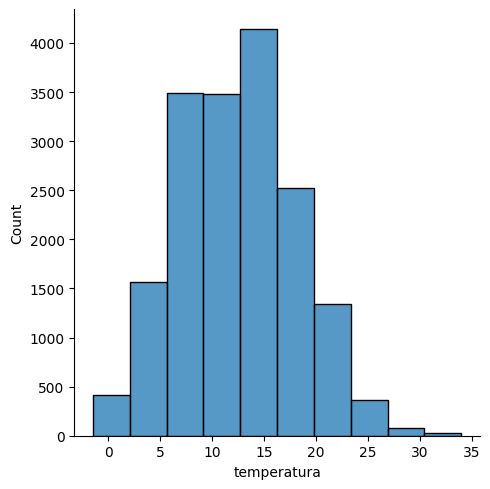

In [14]:
sns.displot(dados_limpo, x='temperatura', bins = 10)
plt.show()

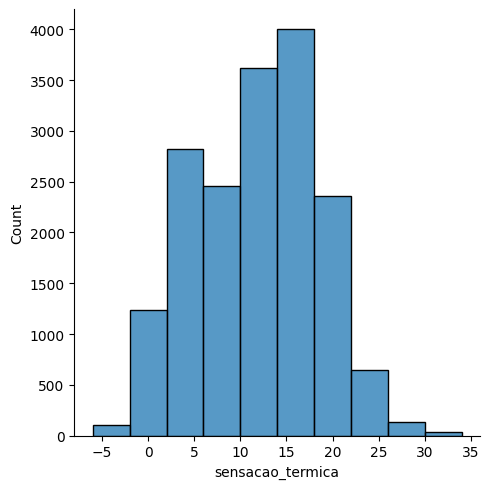

In [15]:
sns.displot(dados_limpo, x='sensacao_termica', bins = 10)
plt.show()

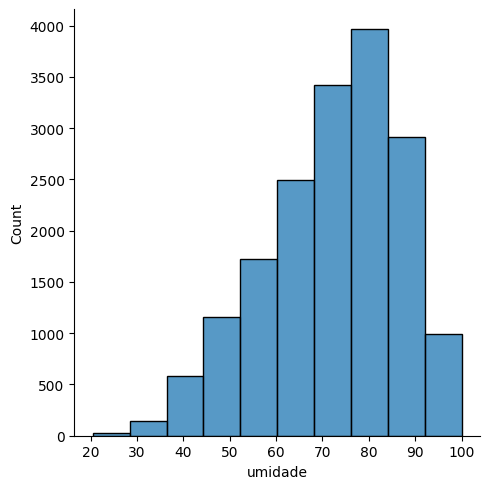

In [16]:
sns.displot(dados_limpo, x='umidade', bins = 10)
plt.show()

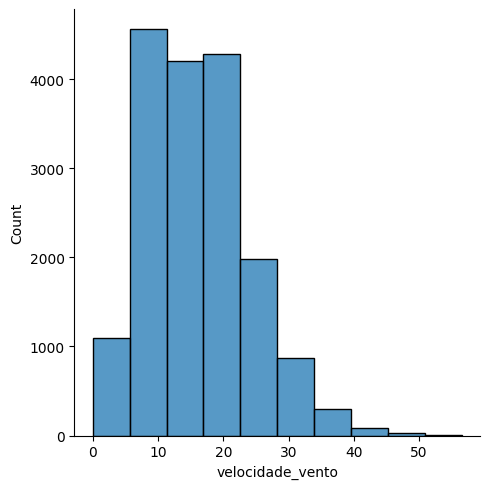

In [17]:
sns.displot(dados_limpo, x='velocidade_vento', bins = 10)
plt.show()

Investigando relações entre variáveis


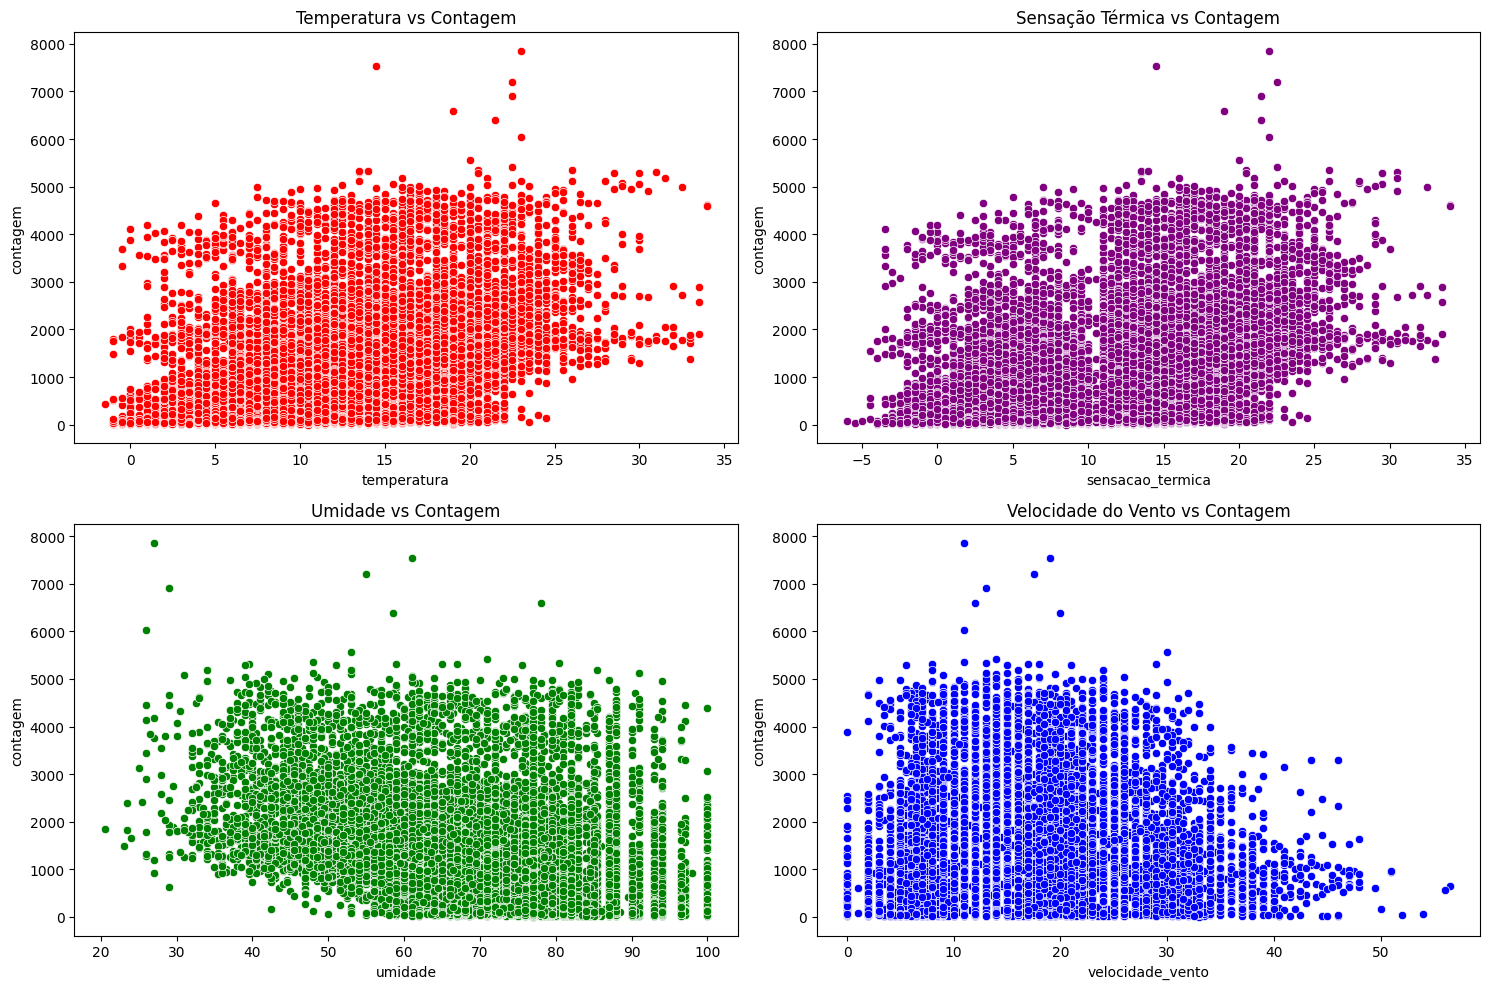

In [18]:
# prompt: crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um título.

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the scatterplots
sns.scatterplot(ax=axes[0, 0], data=dados_limpo, x='temperatura', y='contagem', color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=dados_limpo, x='sensacao_termica', y='contagem', color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=dados_limpo, x='umidade', y='contagem', color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=dados_limpo, x='velocidade_vento', y='contagem', color='blue')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Conseguimos analisar várias informações com os gráficos de dispersão, entendemos que não existe uma relação linear nesse caso.

Examinando a correlação entre as variáveis,gerando um mapa de calor 

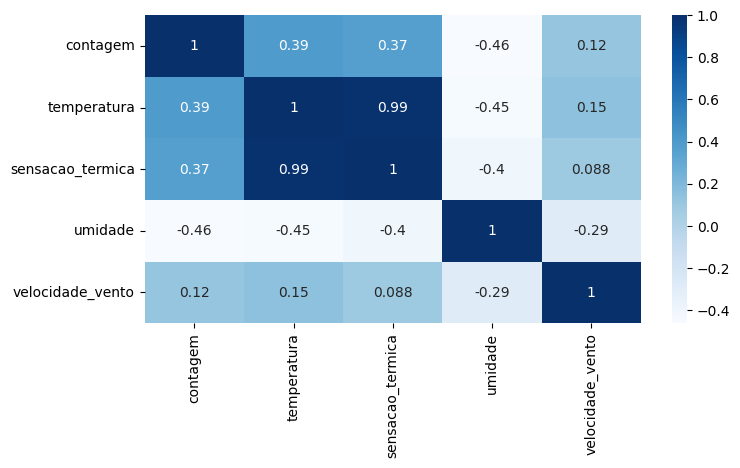

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(dados_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

A partir dessa análise, entendemos como a velocidade do vento mais alta pode impactar na demanda, assim como o impacto de umidades mais baixas, trazendo menos bicicletas, por exemplo. Além disso, avaliamos essas mesmas ocorrências em relação à temperatura e à sensação térmica.

Obtendo estatísticas descritivas


In [20]:
dados_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


Analisando valores unicos das colunas Relevantes

In [21]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f'Coluna: {col}')
    print(dados_limpo[col].unique())
    print('='*15,'\n')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



Ja entendemos melhor os dados, agora vamos explorar esses dados mais fundos. com as colunas de feriado e final de semana , já que a empresa que nós contratou tem duvidas sobre a demanda desses dias

Comparando dias normais, feriados e finais de semana

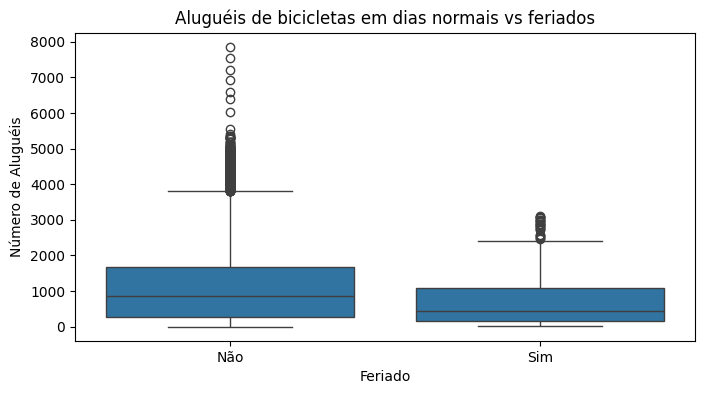

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', order=['Não', 'Sim'], data=dados_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de Aluguéis')
plt.show()

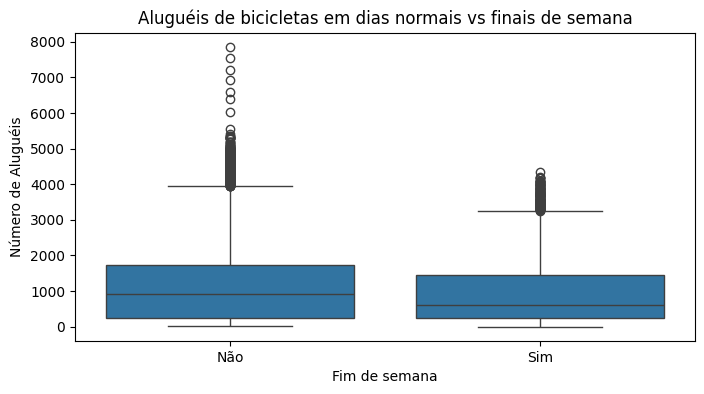

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', order=['Não', 'Sim'], data=dados_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de Aluguéis')
plt.show()

Com analise das comparações , conseguimos obter a informação que em dias de semanas a demanda é maior que nso finais de semanas e em feriados. para confirmar calcular a mediana 

Calculando a mediana de bicicletas alugadas

In [24]:
mediana_feriado = dados_limpo.groupby('feriado')['contagem'].median()
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [25]:
mediana_fim_de_semana = dados_limpo.groupby('fim_de_semana')['contagem'].median()
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

Esses números nos fornecem uma visão clara das diferenças no aluguel de bicicletas ao longo da semana

Será que o clima afeta a demanda ? vamos investigar 


In [26]:
dados_clima = dados_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
dados_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


Vamos visualizar atraves de um grafico 

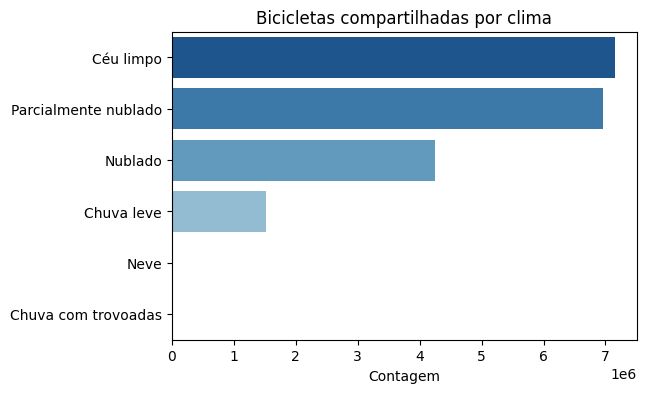

In [27]:
df_clima = dados_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Conseguimos visualizar que em dias de melhores condições temos uma demanda mais alta. 

Agora vamos analisar a distruição com a coluna estação 

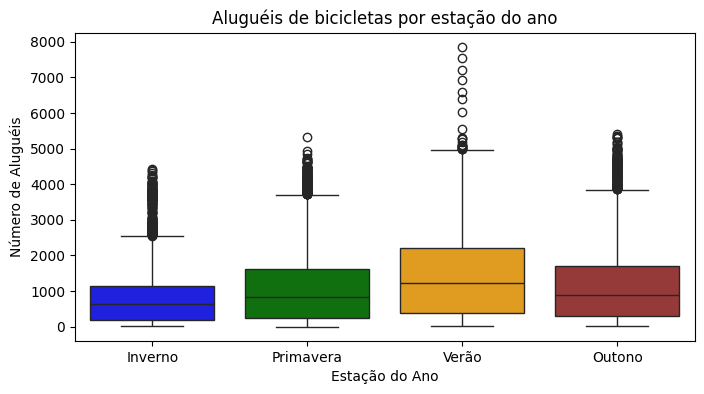

In [28]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=dados_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()

Comparando a mediana de cada estação


In [29]:
dados_limpo.groupby('estacao')['contagem'].median()


estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

Tivemos o resultado esperado , e sabemos que no verao a demanda da mediana é a mais alta. 

Agora podemos usar um teste estatistico para comparar primavera e outono, e verificar se elas realmente são diferentes 

In [30]:
#Teste Mann-Whitney
from scipy.stats import mannwhitneyu

In [31]:
from scipy.stats import mannwhitneyu

primavera = dados_limpo[dados_limpo['estacao'] == 'Primavera']['contagem']
outono = dados_limpo[dados_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646297))

Agora temos a certeza que de fato , são sim diferentes. Assim a ideia é que a empresa tenha planos de ações diferentes para cada uma das estações 

Convertendo o tipo do dado "data e hora"


In [32]:
dados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [33]:
#Copia do Data Frame
dados_data = dados_limpo.copy()

Convertendo a coluna Data_hora 

In [34]:
dados_data['data_hora'] = pd.to_datetime(dados_data['data_hora'])
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


Extraindo mês e hora para colunas separadas


In [35]:
dados_data['mes'] = dados_data['data_hora'].dt.month
dados_data['horario'] = dados_data['data_hora'].dt.hour
dados_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [36]:
# Retirando o horário da coluna data_hora
dados_data['data_hora'] = dados_data['data_hora'].dt.date
dados_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


Renomeando a a coluna data_hora para data

In [37]:
dados_data = dados_data.rename(columns={'data_hora':'data'})
dados_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [38]:
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 1.6+ MB


A coluna data voltou a ser do tipo object , vamos fazer a conversão.

In [39]:

dados_data['data'] = pd.to_datetime(dados_data['data'])
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 1.6+ MB


Agora podemos fazer nossa analise sobre demandas por horario 

Agrupando por horário e somando a contagem de bicicletas

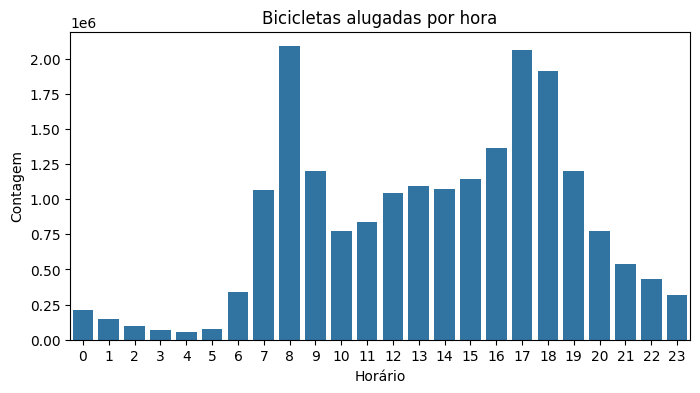

In [40]:
dados_por_hora = dados_data.groupby('horario')['contagem'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=dados_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

Conseguimos analisar que os horarios de pico , são as oito da manha e cinco horas da tarde , ou seja provavelmente quando as pessoas esão indo ou voltando do trabalho, faculdade ou escola 

Vamos analisar o fim de semana 

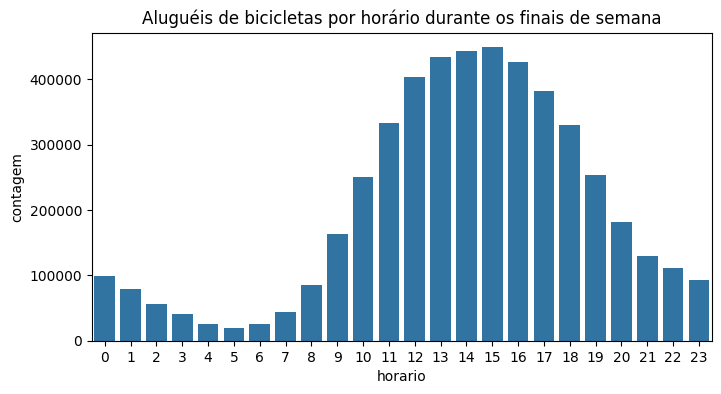

In [41]:
dados_fim_de_semana = dados_data[dados_data['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = dados_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')
plt.show()

Diferente dos dias das semana, podemos observar que o pico ocorre entre meio dia e o final da tarde, atingindo uma demanda maior as 15 horas. Provavelmente quando as pessoas estão a lazer com a familia 

Bora analisar a demanda por dia e mes

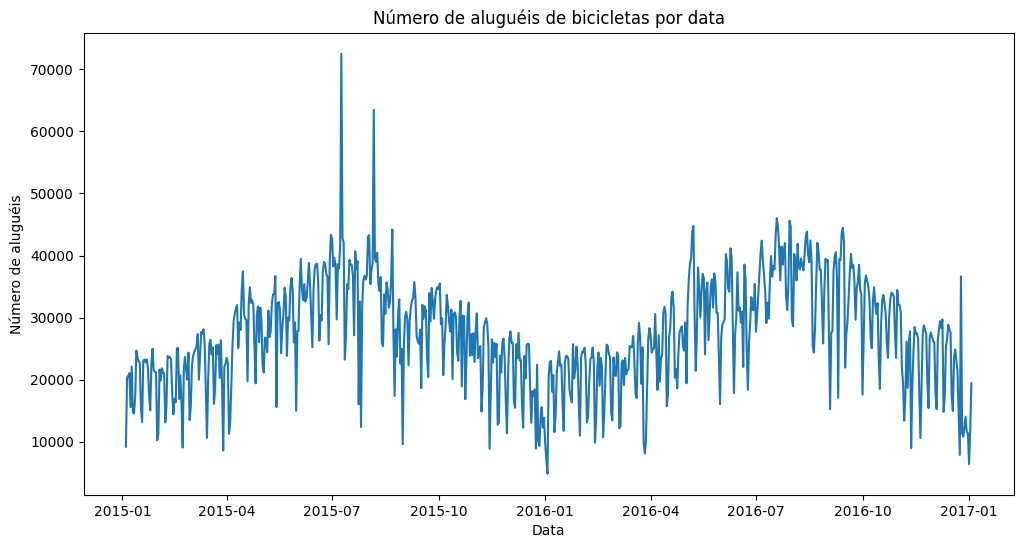

In [42]:
dados_tempo = dados_data.groupby('data')['contagem'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=dados_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

ja conseguimos tirar insights valiosos , observe que entre um ano e outro temos um aumento de demanda no meio do ano ? ja que estavamos analisando um pais europeu isso so confirma que nossa analise das estação do ano estava correda , ja que na europa o verao é no meio do ano 

Conclusão: Conseguimos observar a sazonalidade


Realizando a previsão

In [43]:
from prophet import Prophet

C:\Users\rafae\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Criação do DataFrame para previsões


In [44]:
dados_prothet = dados_data[['data','contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
dados_prothet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


Agrupamento de dados : vamos resetar os indices para obter o dataframe limpo


In [45]:
dados_prothet = dados_prothet.groupby('ds')['y'].sum().reset_index()
dados_prothet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


Funcionou conforme esperávamos e temos cerca de 730 dias para prever o futuro.

Definindo a semente aleatória


In [46]:
# Definindo um seed para garantir a reprodutibilidade
import numpy as np
np.random.seed(4587)

Criação e treinamento do modelo

In [47]:
modelo = Prophet()
modelo.fit(dados_prothet)

17:30:59 - cmdstanpy - INFO - Chain [1] start processing
17:30:59 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsao = modelo.predict(futuro)

Visualização dos resultados

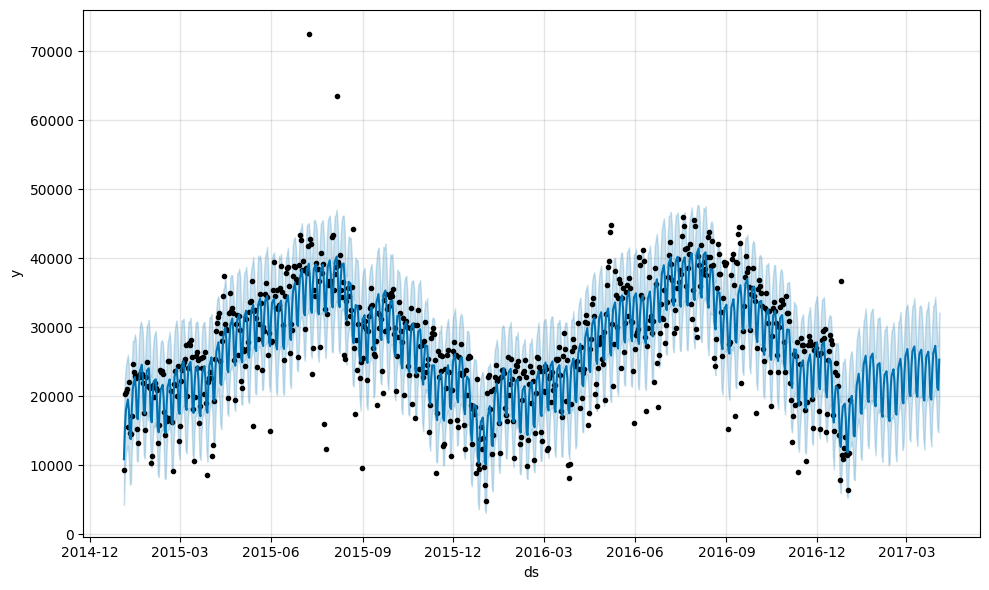

In [49]:
fig1 = modelo.plot(previsao)

Explorando os valores previstos


In [50]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10867.436698,4248.681464,17121.906796
1,2015-01-05,15279.441783,8890.570729,22594.402077
2,2015-01-06,17984.434533,11808.797686,24375.208227
3,2015-01-07,18716.667970,12325.180844,25327.444016
4,2015-01-08,19529.925007,12793.113904,25988.199728
...,...,...,...,...
815,2017-03-30,27303.158028,20890.868485,34391.306911
816,2017-03-31,25530.545826,19354.636545,32029.859379
817,2017-04-01,21214.278115,15449.716281,27696.529702
818,2017-04-02,20897.149453,14749.799059,27208.615968


Interpretação dos gráficos de componentes diferentes

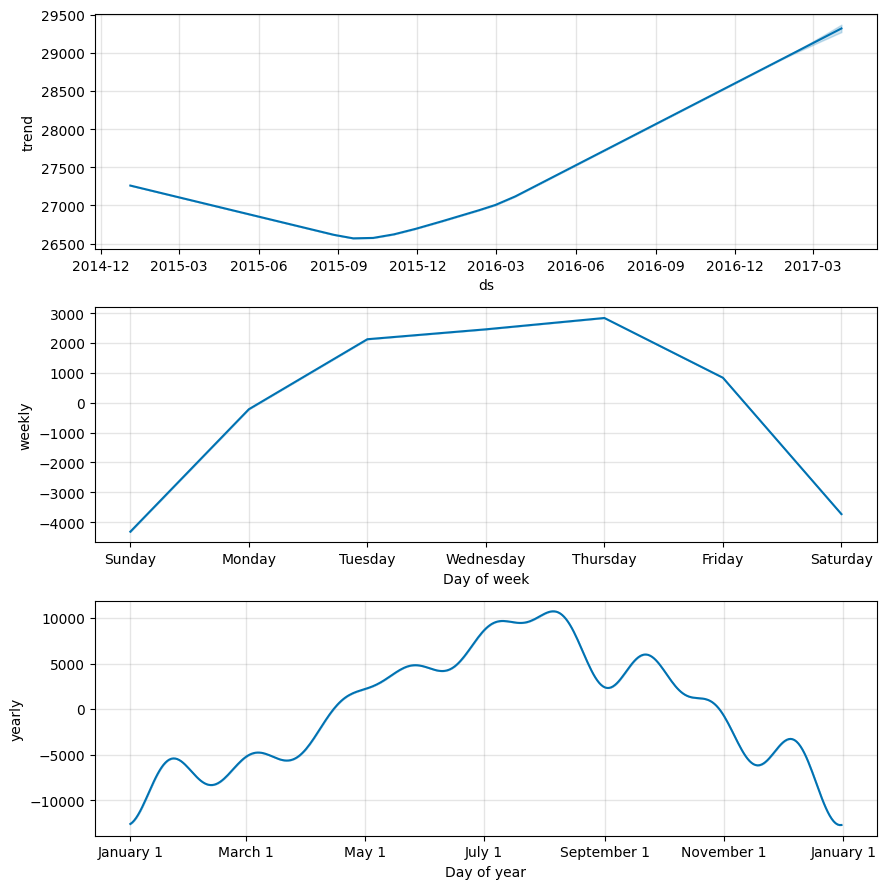

In [51]:
fig2 = modelo.plot_components(previsao)

O primeiro componente é a tendência. Ele indica se a previsão está aumentando ou diminuindo. Aqui, indica que a previsão está subindo.

Também temos dois componentes relacionados à sazonalidade. Um desses componentes é semanal, e podemos observar como os aluguéis diminuem nos finais de semana. O gráfico mostra os valores para cada dia da semana, onde vemos que os aluguéis são mais baixos aos domingos, aumentam na segunda e terça-feira, permanecem estáveis entre quarta e quinta-feira, e diminuem novamente de quinta para sexta-feira e de sexta para sábado.

Outro componente considerado para a previsão é o anual. Podemos ver que os aluguéis são mais baixos em janeiro, aumentam gradualmente até o meio do ano, alcançando o pico, e então diminuem novamente até o final do ano.

Separando entre treino e teste

In [52]:
dados_prothet.shape

(730, 2)

Criação dos DataFrames de treino e teste


DataFrame de treino

In [53]:
dados_treino = pd.DataFrame()
# Separando em 80% dos dados para treino
dados_treino['ds'] = dados_prothet['ds'][:584] 
dados_treino['y'] = dados_prothet['y'][:584]

DataFrame de teste


In [54]:
dados_teste = pd.DataFrame()
# Separando em 20% dos dados para teste
dados_teste['ds'] = dados_prothet['ds'][584:]
dados_teste['y'] = dados_prothet['y'][584:]

Treinamento do modelo com dados de treino

Agora vamos fazer a previsão dos dados futuros 

Vamos criar um DataFrame com o metod make_future_dataframe, definindo um periodo de 150 dias com uma frequencia diaria 

In [55]:
np.random.seed(4587)
modelo = Prophet()
modelo.fit(dados_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

17:31:00 - cmdstanpy - INFO - Chain [1] start processing
17:31:01 - cmdstanpy - INFO - Chain [1] done processing


Visualização da previsão e dos dados de teste


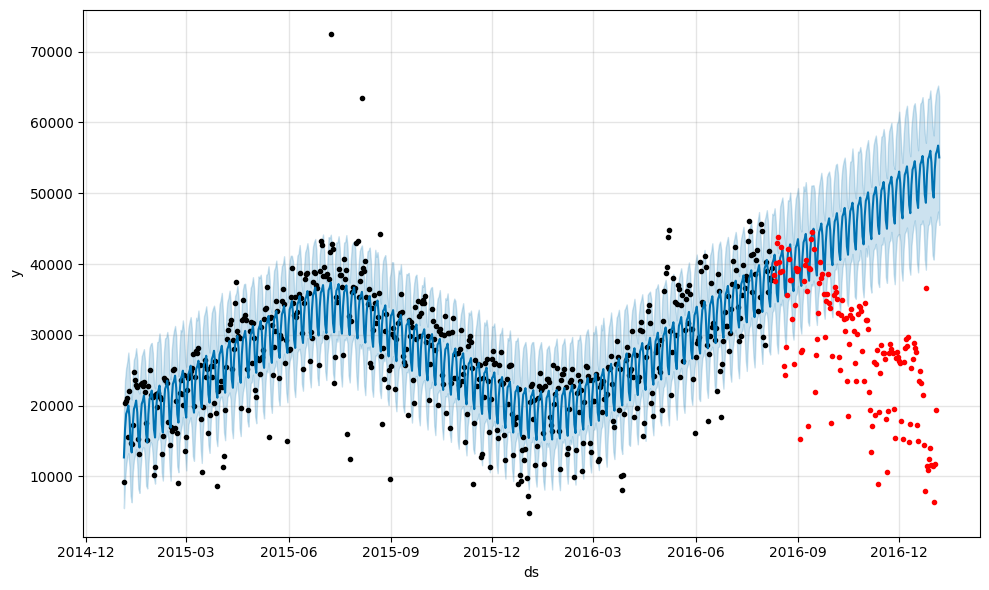

In [56]:
fig1 = modelo.plot(previsao)
plt.plot(dados_teste['ds'], dados_teste['y'], '.r')

Ao visualizar a previsão, notamos que os pontos de teste em vermelho não se encaixam bem na previsão

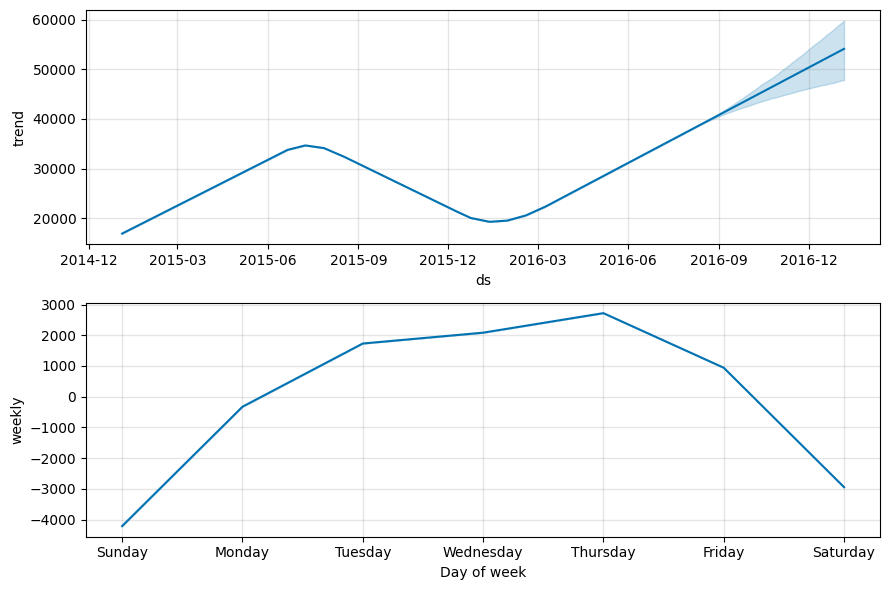

In [57]:
fig2 = modelo.plot_components(previsao)

Primeiro, vemos que a tendência está subindo, quando, na verdade, deveria estar descendo conforme os dados de teste indicam. Isso mostra que o modelo não conseguiu capturar corretamente a tendência dos dados

Métrica de avaliação da performance do modelo :

Agora, precisamos entender quão ruim está a performance do modelo. Para isso, utilizaremos uma métrica apropriada

In [58]:
dados_previsao = previsao[['ds','yhat']]

In [59]:
#Merge que permite unir DataFrames com base em uma coluna comum.
dados_comparacao = pd.merge(dados_previsao, dados_teste, on='ds')
dados_comparacao

,ds,yhat,y
0,2016-08-10,40578.718163,38430
1,2016-08-11,41319.073556,37626
2,2016-08-12,39648.849935,40159
3,2016-08-13,35867.643110,43041
4,2016-08-14,34706.462122,43848
...,...,...,...
141,2016-12-30,54329.197100,11566
142,2016-12-31,50547.990274,11424
143,2017-01-01,49386.809286,6421
144,2017-01-02,53373.710583,11823


Quantificaçao dos erros


Para quantificar esses erros, precisamos de uma métrica que compare os valores reais (y) com os valores previstos (yhat) e calcule uma média do erro. Uma métrica adequada para isso é o Erro Quadrático Médio (MSE)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(dados_comparacao['y'], dados_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE:{mse}, RMSE:{rmse}')

MSE:461012998.29720056, RMSE:21471.21324697793


Isso significa que nosso modelo está errando, em média, 21471 bicicletas por dia

Ajustando a previsão


In [62]:
np.random.seed(4587)
modelo = Prophet(yearly_seasonality=True)
modelo.fit(dados_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

17:31:03 - cmdstanpy - INFO - Chain [1] start processing
17:31:03 - cmdstanpy - INFO - Chain [1] done processing


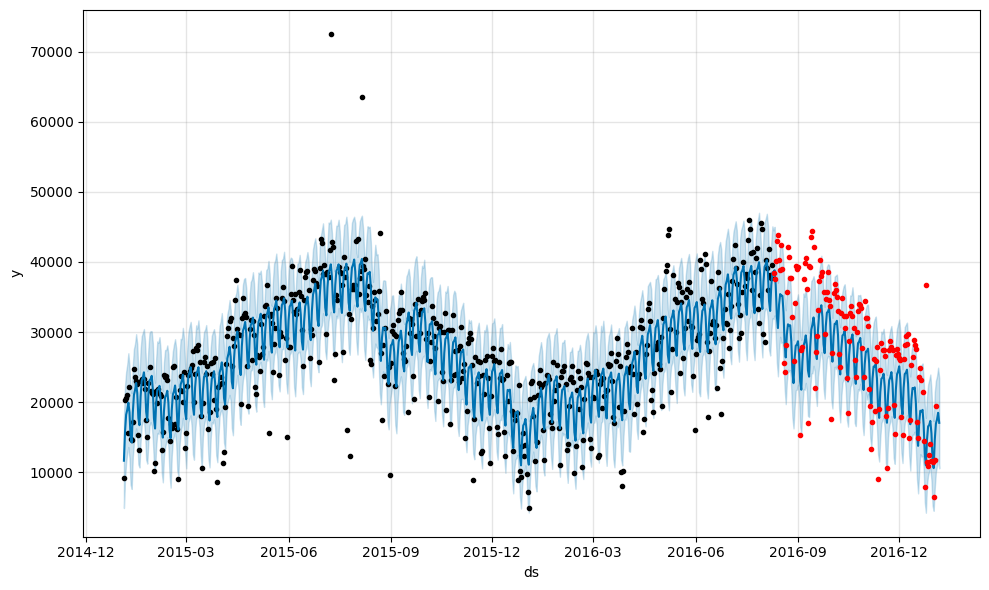

In [63]:
fig = modelo.plot(previsao)
plt.plot(dados_teste['ds'], dados_teste['y'], '.r')

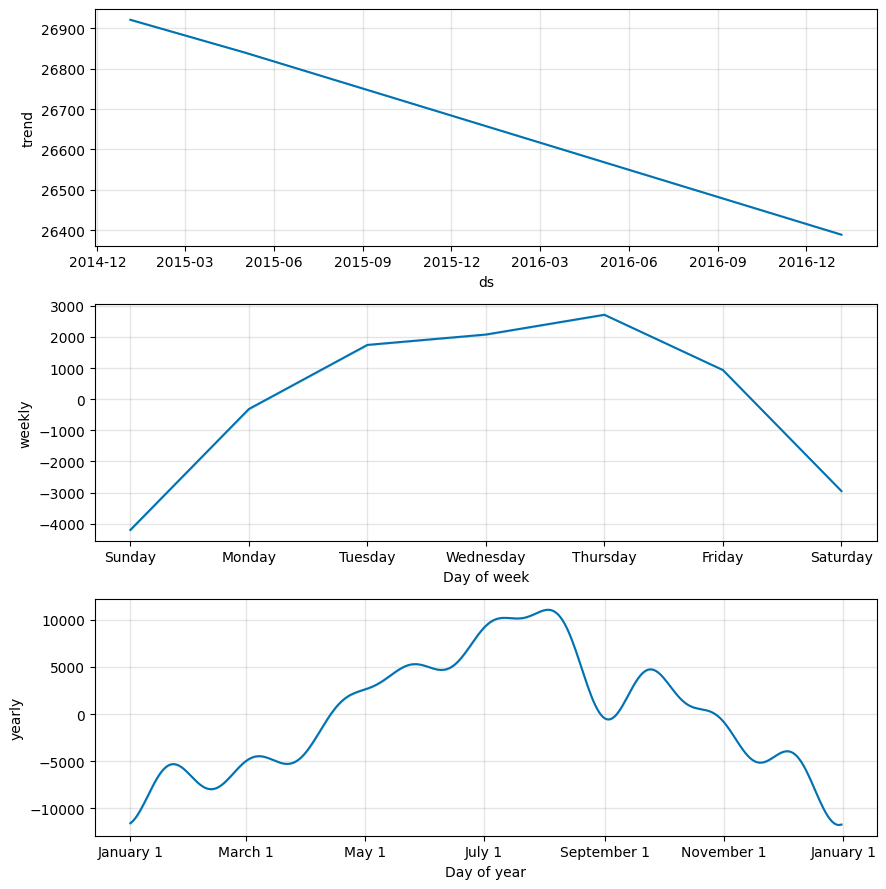

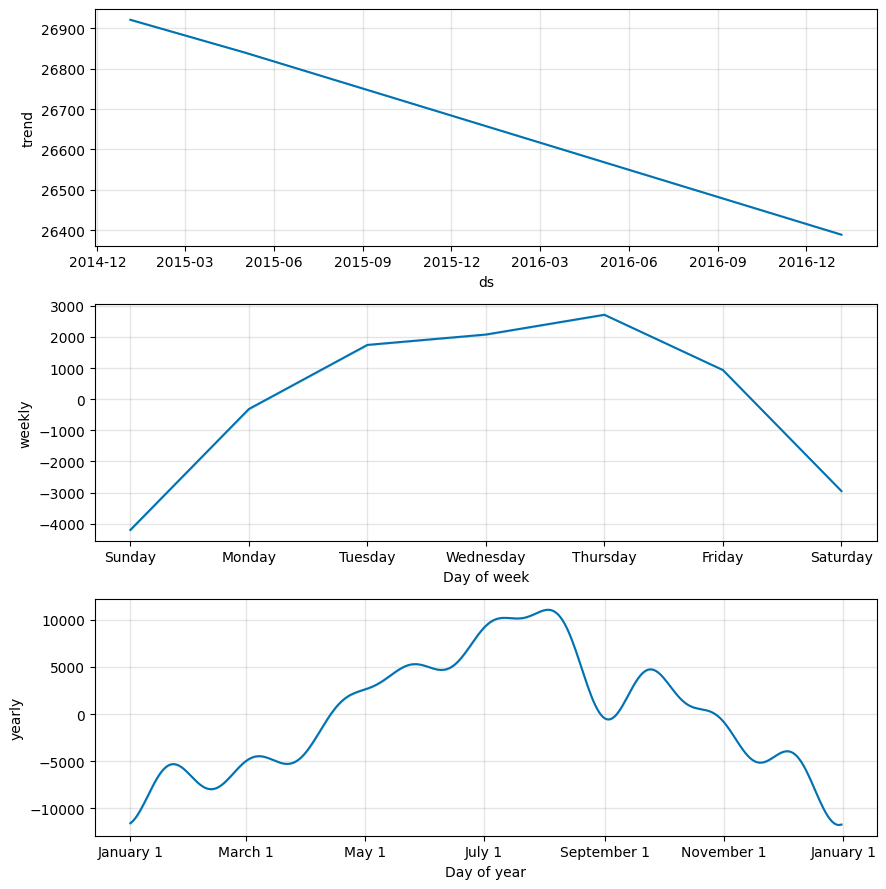

In [64]:
modelo.plot_components(previsao)

Verificando o RMSE

In [65]:
dados_previsao = previsao[['ds', 'yhat']]
dados_comparacao = pd.merge(dados_previsao, dados_teste, on='ds')
dados_comparacao

,ds,yhat,y
0,2016-08-10,38535.991663,38430
1,2016-08-11,38820.212318,37626
2,2016-08-12,36645.867170,40159
3,2016-08-13,32314.809863,43041
4,2016-08-14,30575.120022,43848
...,...,...,...
141,2016-12-30,15566.419734,11566
142,2016-12-31,11741.513975,11424
143,2017-01-01,10608.947909,6421
144,2017-01-02,14663.372319,11823


In [66]:
mse = mean_squared_error(dados_comparacao['y'], dados_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE:{rmse}')

MSE:38023258.39534487, RMSE:6166.3002193653265


Removendo os outliers


Para fazer esse tratamento. Na próxima célula vazia, vamos chamar novamente o df_prophet, o DataFrame inicial que fizemos no começo, antes de separar os dados em treino e teste.

In [67]:
dados_prothet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


Criando um modelo para obter os intervalos de confiança

In [68]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(dados_prothet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

17:31:05 - cmdstanpy - INFO - Chain [1] start processing
17:31:05 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
sem_outliers = dados_prothet[(dados_prothet['y'] > previsao['yhat_lower']) & (dados_prothet['y'] < previsao['yhat_upper'])]
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


temos bem menos que a anterior

Criando o dataframe de treino


In [70]:
dados_treino = pd.DataFrame()
dados_treino['ds'] = sem_outliers['ds'][:505]
dados_treino['y'] = sem_outliers['y'][:505]

Criando o dataframe de teste

In [71]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = sem_outliers['ds'][505:]
dados_teste['y'] = sem_outliers['y'][505:]

Melhorando o Modelo de Previsão


In [72]:
#Criando o modelo
np.random.seed(4587)
modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(dados_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

17:31:05 - cmdstanpy - INFO - Chain [1] start processing
17:31:05 - cmdstanpy - INFO - Chain [1] done processing


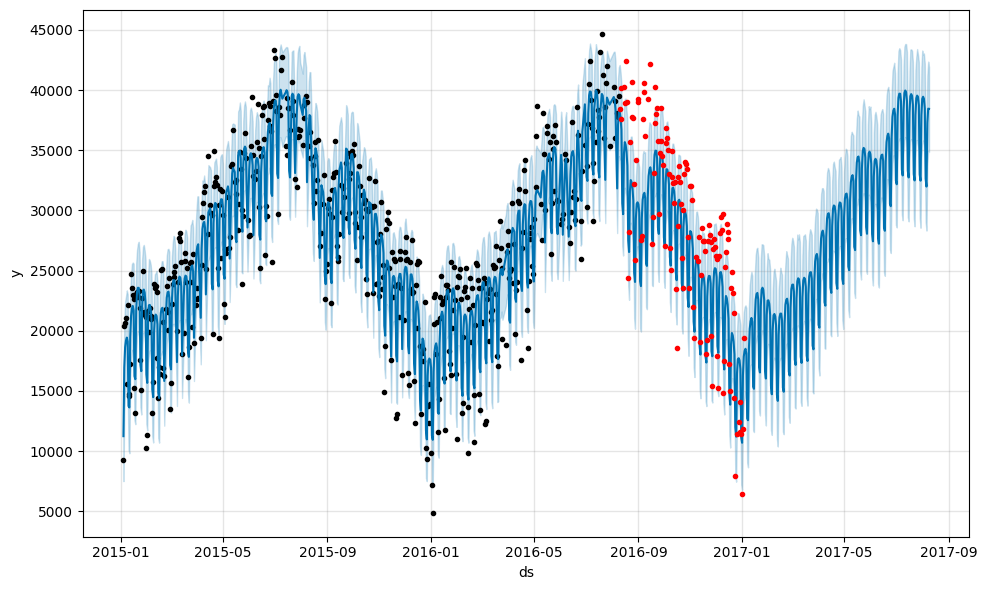

In [73]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(dados_teste['ds'], dados_teste['y'], '.r')

Vamos verificar se a métrica que estamos analisando, o RMSE, diminuiu ou continua parecida com o valor anterior

In [74]:
dados_previsao = previsao[['ds', 'yhat']]
dados_comparacao = pd.merge(dados_previsao, dados_teste, on='ds')
dados_comparacao

,ds,yhat,y
0,2016-08-10,38158.491516,38430
1,2016-08-11,37743.680499,37626
2,2016-08-12,36700.553377,40159
3,2016-08-15,34731.615970,40236
4,2016-08-16,35674.240835,38911
...,...,...,...
121,2016-12-30,16811.793881,11566
122,2016-12-31,11106.021022,11424
123,2017-01-01,10688.005959,6421
124,2017-01-02,16296.279237,11823


In [75]:
mse = mean_squared_error(dados_comparacao['y'], dados_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15478875.733726533, RMSE: 3934.3202378208275


Temos um RMSE de 3.934 .Conseguimos diminuir bastante o erro. O resultado atual ficou bem melhor do que o anterior.

Aumentando o período da previsão

In [76]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(dados_treino)
#Periodo de 365 dias
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

17:31:07 - cmdstanpy - INFO - Chain [1] start processing
17:31:07 - cmdstanpy - INFO - Chain [1] done processing


Vamos analisar os dados dinamicamente 

In [81]:
from prophet.plot import plot_plotly

In [82]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()

Se passarmos o mouse pela previsão, veremos o dia, o mês, o ano e o valor previsto para esse dia. Esse gráfico possui uma barra menor embaixo, a qual podemos mover lateralmente para manipular o período de previsão que queremos exibir. Além disso, podemos deslocar os marcadores que estão nas laterais dessa barra, diminuindo e aumentando-as para ter um controle da quantidade de dados que queremos ver na imagem.

Assim concluimos nosso projeto.Nosso grafico acaba sendo muito útil para a empresa que está trabalhando com esse serviço de aluguel de bicicleta. Saber a previsão de amanhã, da semana que vem e do futuro mais distante possibilita que ela se prepare para atender as pessoas da melhor forma possível. 